<img src="https://user-images.githubusercontent.com/26833433/82952157-51b7db00-9f5d-11ea-8f4b-dda1ffecf992.jpg">


<a href="https://colab.research.google.com/github/wandb/examples/blob/master/colabs/yolo/Logging_YOLOv5_Experiments_with_W%26B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://i.imgur.com/gb6B4ig.png" width="400" alt="Weights & Biases" />

# You Always Log Everything (YALE)

### Logging YOLOv5 Experiments with W&B

[YOLO](https://github.com/ultralytics/yolov5) ("You Only Look Once") provides tools for real-time object detection with convolutional neural networks.

YOLO now works with [Weights & Biases](http://wandb.com),
an experiment tracking toolkit, so you can
keep track of all the hyperparameters you've tried,
view real-time updates on system and model metrics,
version and store datasets and models,
[and more](http://github.com/wandb/examples)!

In this colab, we'll show you how to use YOLO and W&B together.
**It's as easy as running a single `pip install` before you run your YOLO experiments!**

<h3> Follow along with a <a href="http://wandb.me/yolov5-video"> video tutorial</a> on YouTube. </h3>


# 0. Setup



First, let's get ourselves organized: clone the repo, install our dependencies, and confirm we've got PyTorch and a GPU.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.7.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


# 1. Inference

Now, let's apply a pre-trained, already existing object detection network.

`detect.py` runs inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases).

Here, we'll just run a sample image through that network to make sure everything is working.

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='data/images/', update=False, view_img=False, weights=['yolov5s.pt'])
YOLOv5 v4.0-11-gdd03b20 torch 1.7.0+cu101 CUDA:0 (Tesla T4, 15079.75MB)

100% 14.1M/14.1M [00:00<00:00, 20.8MB/s]

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients, 17.0 GFLOPS
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 buss, Done. (0.033s)
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 1 ties, Done. (0.014s)
Results saved to runs/detect/exp
Done. (0.254s)


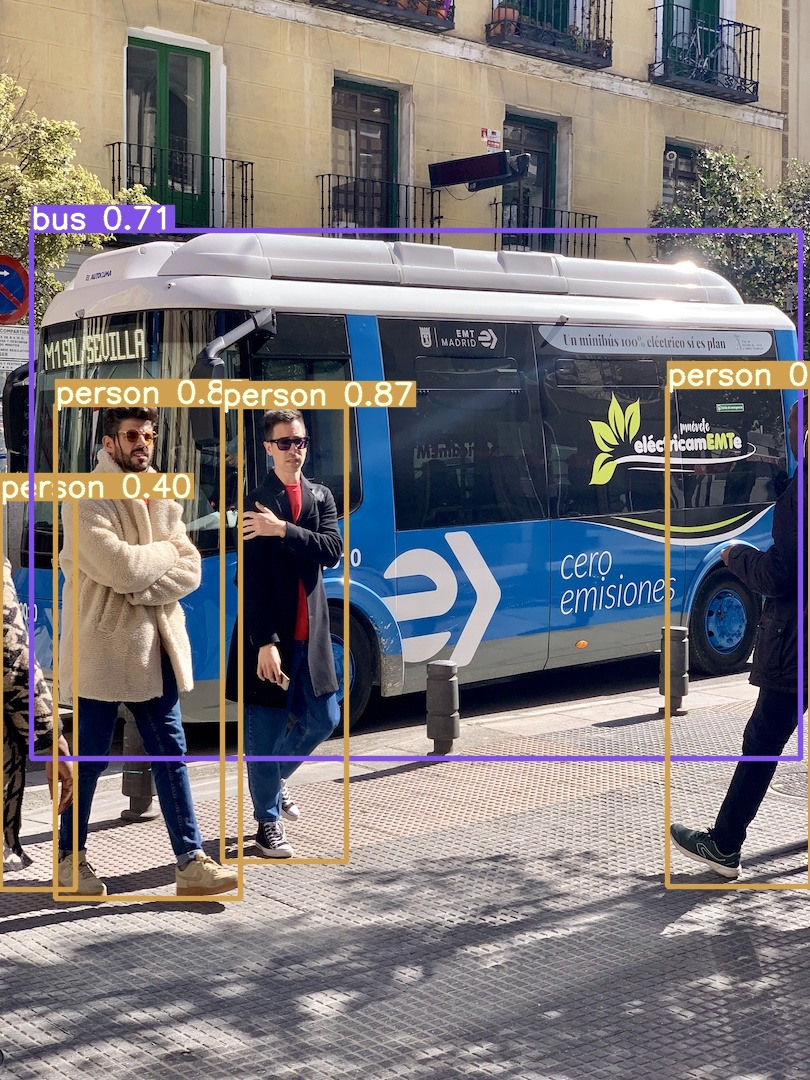

In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/
Image(filename='runs/detect/exp/bus.jpg', width=600)

Results are saved to `runs/detect`. A full list of available inference sources:
<img src="https://user-images.githubusercontent.com/26833433/98274798-2b7a7a80-1f94-11eb-91a4-70c73593e26b.jpg" width="900"> 

# 2. Training to Fine-Tune

For applications, it's often important to take a pre-trained model
and fine-tune it to work on a specific dataset --
[for example, in a construction safety application](https://wandb.ai/authors/artifact-workplace-safety/reports/Organize-Your-Machine-Learning-Pipelines-with-Artifacts--VmlldzoxODQwNTY), we might use fine-tuning to specialize our network in detecting the presence/absence of protective equipment.

We'll mimic this process on the
[COCO128](https://www.kaggle.com/ultralytics/coco128) image tutorial dataset.

In [ ]:
2# Download COCO128
torch.hub.download_url_to_file('https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../ && rm tmp.zip

## Weights & Biases Logging (🚀 NEW)

[Weights & Biases](https://www.wandb.com/) (W&B) is now integrated with YOLOv5 for real-time visualization and cloud logging of training runs. This allows for better run comparison and introspection, as well improved visibility and collaboration among team members. To enable W&B logging install `wandb`, and then train normally (you will be guided through setting up `wandb` account during your first use).


In [ ]:
%%capture
!pip install wandb

And that's it! So long as W&B is installed, you'll get rich, detailed metrics in a live dashboard accessible from a browser on any device.

Just click the link that appears below next to `wandb` and the 🚀 emoji.

In [ ]:
# Train YOLOv5s on COCO128 for 5 epochs
!python train.py --img 640 --batch 64 --epochs 5 --data coco128.yaml --weights yolov5s.pt

YOLOv5 v4.0-11-gdd03b20 torch 1.7.0+cu101 CUDA:0 (Tesla T4, 15079.75MB)

Namespace(adam=False, batch_size=64, bucket='', cache_images=False, cfg='', data='./data/coco128.yaml', device='', epochs=5, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], local_rank=-1, log_artifacts=False, log_imgs=16, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp', single_cls=False, sync_bn=False, total_batch_size=64, weights='yolov5s.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
2021-01-12 23:35:14.827312: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, b

With W&B, during training you will see live updates on the dashboard at [wandb.ai](https://www.wandb.ai/), including interactive bounding box visualizations (look for a panel called "Images" in the Media panel section), and you can create and share detailed [Reports](https://wandb.ai/glenn-jocher/yolov5_tutorial/reports/YOLOv5-COCO128-Tutorial-Results--VmlldzozMDI5OTY) of your results. For more information see the [YOLOv5 Weights & Biases Tutorial](https://github.com/ultralytics/yolov5/issues/1289)
or check out the [video tutorial for this notebook](http://wandb.me/yolov5-video).

<img src="https://user-images.githubusercontent.com/26833433/98184457-bd3da580-1f0a-11eb-8461-95d908a71893.jpg" width="800">